На сликата подолу е прикажан дел од ЕР дијаграм за здравствен систем.

| 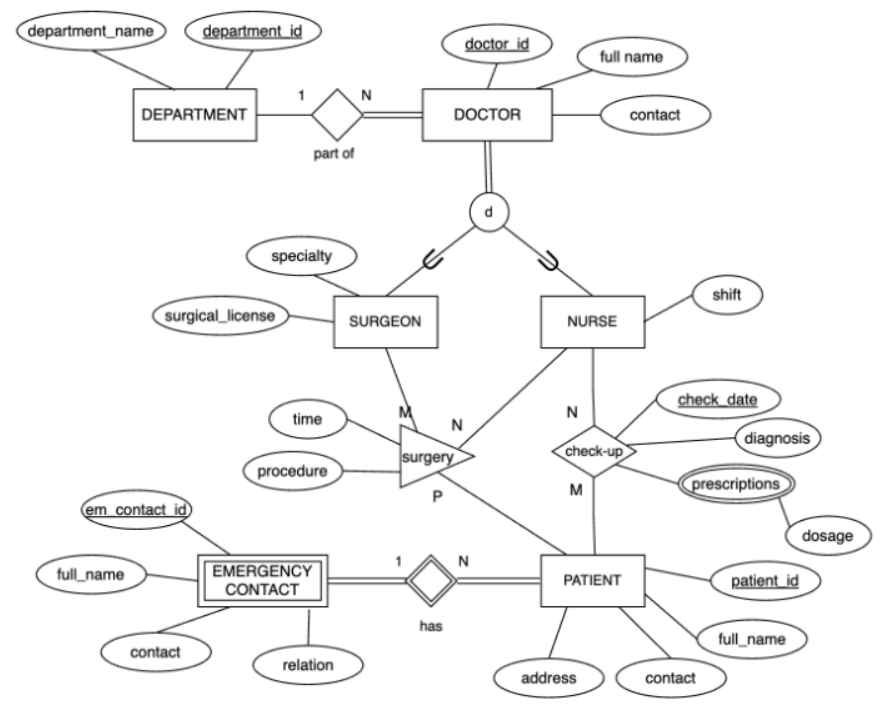<br> |  | Релационата база е дефинирана преку следните релации: <br>DEPARTMENT (<u>dept\_id</u>, name)DOCTOR (<u>doctor\_id</u>, dept\_id\*, full\_name, contact)<br>SURGEON (<u>doctor\_id</u>\*, speciality, surgical\_license)NURSE (<u>doctor\_id</u>\*, shift)<br>PATIENT (<u>patient\_id</u>, full\_name, contact, address)<br>EMERGENCY\_CONTACT (<u>patient\_id</u>\*, <u>em\_contact\_id</u>, full\_name, contact, relation)<br>SURGERY (<u>surgeon\_id</u>\*, <u>nurse\_id</u>\*, <u>patient\_id</u>\*, time, procedure)<br>CHECK\_UP (<u>nurse\_id</u>\*, <u>patient\_id</u>\*, <u>check\_date</u>, diagnosis)<br>PRESCRIPTIONS (<u>nurse\_id</u>\*, <u>patient\_id</u>\*, <u>check\_date</u>\*, <u>prescription</u>, dosage) |
| --- | --- | --- |

Да се напишат DDL изразите за сите ентитетни множества кои се дефинирани во релациониот модел. Дополнително, потребно е да бидат исполнети следните барања:

- **Сакаме да водиме евиденција за прегледите („check\_up“) направени од медицински сестри („nurse“) кои се избришани од системот при што ќе се чува предефинирана вредност.**
- **Информацијата за смената („shift“) на медицинските сестри („nurse“) треба да имаат предефинирана вредност 'DAY'.**
- **Хируршката лиценца („surgical\_license“) мора да има различни (уникатни) вредности.**
- **Информацијата за смената („shift“) на медицинските сестри („nurse“) мора да биде една од вредностите ('DAY', 'NIGHT', 'ROTATION').**
- **Датумот („check\_date“) на проверката („check\_up“) мора да биде датум во 2025 година.**
- **Описот на процедурата („procedure“) на операција („surgery“) мора да биде пополнет.**
- **Адресата на пациентите треба да има предефинирана вредност 'Not provided'.**
- **Доколку лекот („prescription“) во описот содржи 'fluid' тогаш дозата („dosage“) мора да има вредност која завршува на 'ml'. Додека доколку лекот во описот содржи 'tablet' тогаш дозата мора да има вредност која завршува на 'mg'.**
- **Сакаме да водиме евиденција за операциите („surgery“) за пациенти кои се избришани од системот што што ќе се чува празен податок (NULL).**
- **Специјалноста на еден хирург мора да биде пополнета.**
- **Описот на процедурата на една операција мора да биде внесена со максимум 500 карактери.**
- **Релацијата на контактите на пациент мора да се една од вредностите ('PARENT', 'SIBLING', 'FRIEND', 'SPOUSE', 'OTHER').**

**Забелешка**<span style="font-size:0.9375rem;font-family:-apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, 'Helvetica Neue', Arial, 'Noto Sans', 'Liberation Sans', sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';">: Табелите и атрибутите потребно е да ги креирате со </span> **ИСТИТЕ ИМИЊА и ИСТИОТ РЕДОСЛЕД** <span style="font-size:0.9375rem;font-family:-apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, 'Helvetica Neue', Arial, 'Noto Sans', 'Liberation Sans', sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';">како што е дадено во релациониот модел. За клучевите користете го податочниот тип INT. За надворешните клучеви за кои не е наведено ограничување за референцијален интегритет се претпоставува каскадно бришење/промена. Доколку за некој надворешен клуч ограничите поставување на предефинирана вредност, истата поставете ја на -1. Конкретните вредности за датум дефинирајте ги како TEXT во формат 'YYYY-MM-DD' (на пример "2025-11-29").</span>

In [ ]:
CREATE TABLE DEPARTMENT (
    dept_id INT PRIMARY KEY,
    name VARCHAR(50)
);
    
CREATE TABLE DOCTOR (
    doctor_id INT PRIMARY KEY, 
    dept_id INT,
    full_name TEXT,  
    contact TEXT,

    FOREIGN KEY (dept_id) REFERENCES DEPARTMENT(dept_id)
    ON DELETE CASCADE ON UPDATE CASCADE
);

CREATE TABLE SURGEON(
    -- INTEGER doesn't create a separate automatic index so the right name will be passed in   
    doctor_id INTEGER PRIMARY KEY NOT NULL, 
    speciality NVARCHAR(255) NOT NULL,
    surgical_license VARCHAR(50) NOT NULL UNIQUE,
    
    FOREIGN KEY (doctor_id) REFERENCES DOCTOR(doctor_id)
    ON DELETE CASCADE ON UPDATE CASCADE
);

-- Creates a manual index to occupy seq = 0
CREATE INDEX idx_surgeon_doctor_id ON SURGEON(doctor_id);

CREATE TABLE NURSE(
    doctor_id INT PRIMARY KEY,
    shift VARCHAR(10) NOT NULL DEFAULT 'DAY',

    CONSTRAINT FK_DOCTOR FOREIGN KEY (doctor_id) REFERENCES DOCTOR(doctor_id)
    ON DELETE CASCADE ON UPDATE CASCADE,
    
    -- Checks that the shift is equal to one of the following
    CHECK (shift in ('DAY', 'NIGHT', 'ROTATION'))
);

CREATE TABLE PATIENT (
    patient_id INT PRIMARY KEY,
    full_name VARCHAR(50),
    contact VARCHAR(50),
    address VARCHAR(50) DEFAULT 'Not provided'
);

CREATE TABLE EMERGENCY_CONTACT(
    patient_id INT,
    em_contact_id INT,
    full_name VARCHAR(50),
    contact NVARCHAR(50),
    relation VARCHAR(50),

    -- Declares them together as the primary key
    CONSTRAINT pk_check PRIMARY KEY(patient_id, em_contact_id),

    CONSTRAINT FK_PATIENT FOREIGN KEY (patient_id) REFERENCES PATIENT(patient_id)
    ON DELETE CASCADE ON UPDATE CASCADE,

    -- Checks that the relation is equal to one of the following
    CHECK (relation in ('PARENT', 'SIBLING', 'FRIEND', 'SPOUSE', 'OTHER'))
);

CREATE TABLE SURGERY(
    surgeon_id INT,
    nurse_id INT,
    patient_id INT,
    time NVARCHAR(20),
    procedure nvarchar(500) NOT NULL,

    -- Declares them together as the primary key
    CONSTRAINT pk_check PRIMARY KEY(surgeon_id, nurse_id, patient_id),
    
    CONSTRAINT FK_SURGEON FOREIGN KEY(surgeon_id) REFERENCES SURGEON(doctor_id)
    ON DELETE CASCADE ON UPDATE CASCADE,
    CONSTRAINT FK_NURSE FOREIGN KEY(nurse_id) REFERENCES NURSE(doctor_id)
    ON DELETE CASCADE ON UPDATE CASCADE,
        CONSTRAINT FK_PATIENT FOREIGN KEY(patient_id) REFERENCES PATIENT(patient_id)
    ON DELETE SET NULL ON UPDATE CASCADE,
    
    -- Checks the procedures
    CHECK (LENGTH(procedure) <= 500)
);

CREATE TABLE CHECK_UP(
    nurse_id INT DEFAULT 0,
    patient_id INT,
    check_date VARCHAR(50),
    diagnosis VARCHAR(50),
    
    CONSTRAINT pk_check PRIMARY KEY(nurse_id, patient_id, check_date),

    CONSTRAINT FK_NURSE FOREIGN KEY(nurse_id) REFERENCES NURSE(doctor_id)
    ON DELETE SET DEFAULT ON UPDATE CASCADE,
    CONSTRAINT FK_PATIENT FOREIGN KEY(patient_id) REFERENCES PATIENT(patient_id)
    ON DELETE CASCADE ON UPDATE CASCADE,

    CHECK(check_date LIKE '%2025%')
);

CREATE TABLE PRESCRIPTIONS(
    nurse_id INT DEFAULT 0,
    patient_id INT,
    check_date VARCHAR(20),
    prescription VARCHAR(50),
    dosage NVARCHAR(50),

    CONSTRAINT pk_check PRIMARY KEY(nurse_id, patient_id, check_date, prescription),

    CONSTRAINT FK_CHECK_UP FOREIGN KEY(nurse_id, patient_id, check_date) 
    REFERENCES CHECK_UP(nurse_id, patient_id, check_date)
    ON DELETE CASCADE ON UPDATE CASCADE,

    -- Checks that prescription and dosage have (dosage & ml) or (tablet & mg)
    -- % - any random sign could be before or after the expression
    CHECK(
        (prescription LIKE '%fluid%' AND dosage LIKE '%ml') OR
        (prescription LIKE '%tablet%' AND dosage LIKE '%mg')
    )
);


| Test | Expected | Got |  |
| --- | --- | --- | --- |
|    | 
```
-- Testing with Professor
INSERT INTO Professor VALUES (1, 5);
SELECT * FROM Professor;
```
 | 
```
sm_id       number_of_projects
----------  ------------------
1           5
```
 | 
```
sm_id       number_of_projects
----------  ------------------
1           5
```
 |    |
|    | 
```
-- Testing with Teach
INSERT INTO Teach VALUES (1, 2, 100);
SELECT * FROM Teach;
```
 | 
```
professor_id  assistant_id  course_id
------------  ------------  ----------
1             2             100
```
 | 
```
professor_id  assistant_id  course_id
------------  ------------  ----------
1             2             100
```
 |    |
|    | 
```
-- Testing with Professor_Thesis
INSERT INTO Professor_Thesis VALUES (1, 'Abstract: Cloud-Based Data Processing Systems');
SELECT * FROM Professor_Thesis;
```
 | 
```
sm_id       thesis
----------  ---------------------------------------------
1           Abstract: Cloud-Based Data Processing Systems
```
 | 
```
sm_id       thesis
----------  ---------------------------------------------
1           Abstract: Cloud-Based Data Processing Systems
```
 |    |
|    | 
```
-- Testing with Part_of
INSERT INTO Part_of VALUES (1, 5);
SELECT * FROM Part_of;
```
 | 
```
university_id  network_id
-------------  ----------
1              5
```
 | 
```
university_id  network_id
-------------  ----------
1              5
```
 |    |
|    | 
```
-- Testing with Course
INSERT INTO Course VALUES (100, '2025-10-10', '2026-06-15');
SELECT * FROM Course;
```
 | 
```
id          start_date  end_date
----------  ----------  ----------
100         2025-10-10  2026-06-15
```
 | 
```
id          start_date  end_date
----------  ----------  ----------
100         2025-10-10  2026-06-15
```
 |    |
|    | 
```
-- Testing with University
INSERT INTO University VALUES (1, 'University of Skopje', 1949, 'North Macedonia', 'Skopje', 'Goce Delcev 9');
SELECT * FROM University;
```
 | 
```
id          name                  founding_year  country          city        address
----------  --------------------  -------------  ---------------  ----------  -------------
1           University of Skopje  1949           North Macedonia  Skopje      Goce Delcev 9
```
 | 
```
id          name                  founding_year  country          city        address
----------  --------------------  -------------  ---------------  ----------  -------------
1           University of Skopje  1949           North Macedonia  Skopje      Goce Delcev 9
```
 |    |